In [2]:
import librosa
import scipy 
import numpy as np
import matplotlib.pyplot as plt

### Loading song

In [3]:
song = 'music/Almendra - A Estos Hombres Tristes.wav'

In [134]:
def compute_spectogram( song ,Fs = 22050,N = 2048,H = 1024,bin_max = 128,frame_max = None ):
    l_song, sample_rate = librosa.load(song)
    STFT_song = librosa.stft(l_song, n_fft=N, hop_length=H, win_length=N, window=scipy.signal.hamming)

    if frame_max is None:
        frame_max = STFT_song.shape[0]
    if bin_max is None:
        bin_max = STFT_song.shape[0]
    return librosa.power_to_db(np.abs(STFT_song[:bin_max][:frame_max])**2)



In [135]:
conv_song = compute_spectogram(song)
conv_song.shape


(128, 7715)

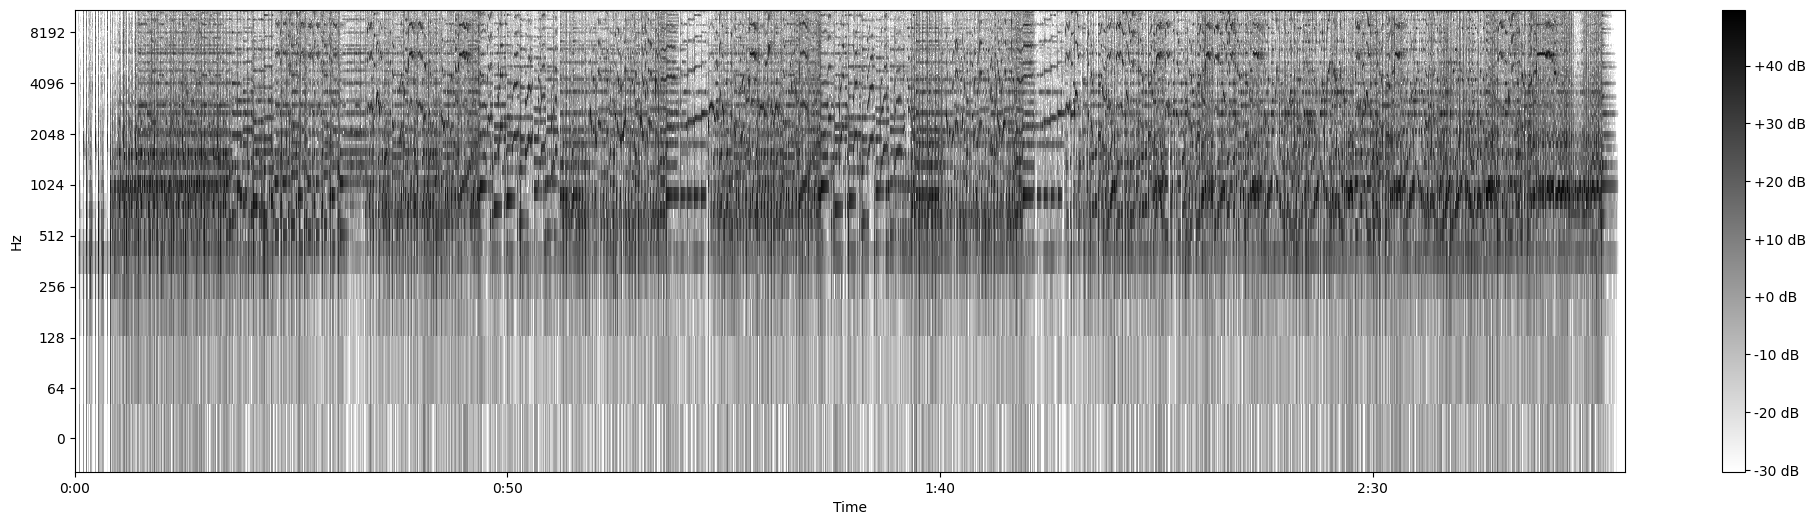

In [136]:
fig, ax =  plt.subplots(figsize=(25, 6))


img  = librosa.display.specshow(conv_song
                                ,  ax=ax, y_axis='log', x_axis='time')
img.set_cmap('gray_r')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [139]:
def plot_final(constellation_map, conv_song,y_lim=None, x_lim=None):
    if constellation_map.ndim > 1:
        (K,N) = constellation_map.shape
    else: 
        N = 1
        K = constellation_map.shape[0]

    if conv_song is None: 
        conv_song = np.zeros((K,N))

    fig, ax = plt.subplots(1,1,figsize=(25, 6))
    ax.imshow(conv_song, cmap='gray_r', interpolation='nearest', aspect='auto', origin='lower')
    n,k = np.argwhere(constellation_map == 1).T
    ax.scatter(k,n, marker='o', color='r', s=10)
    Fs = 1
    if x_lim is None:
        x_lim = [-0.5/Fs, (N-0.5)/Fs]
  
    
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.imshow(constellation_map, cmap='gray_r')
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_title('Constellation Map')
    plt.tight_layout()


/tmp/ipykernel_24430/1312486235.py:3: RuntimeWarning: invalid value encountered in log
  plot_final(constellation_map, conv_song, y_lim=np.log(1+ 1*conv_song))


ValueError: too many values to unpack (expected 2)

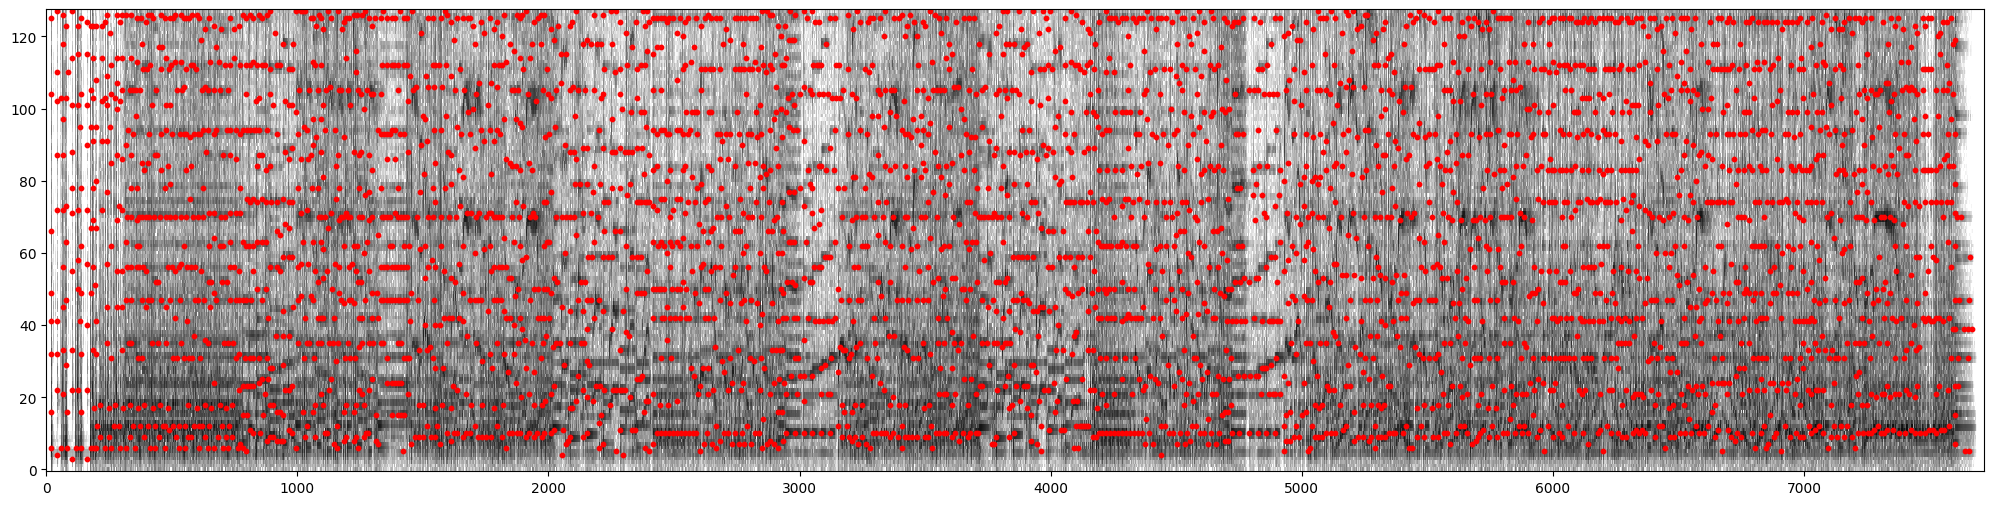

In [140]:
result  = scipy.ndimage.maximum_filter(conv_song, size=[12,15], mode='constant')
constellation_map =  np.logical_and(conv_song == result, result > 0.01)
plot_final(constellation_map, conv_song, y_lim=np.log(1+ 1*conv_song))